Epsilon-Greedy Q-values: [ 0.50945643  0.50500774  0.13645871  0.50939951 -0.99873712 -0.14402955
 -0.00662668 -1.00036739  1.69329541  0.10120906]
Total reward (Epsilon-Greedy): 517.07

Softmax Q-values: [ 0.         -0.53010902 -0.03225521  0.          0.          0.
  0.          0.          1.62788909  0.        ]
Total reward (Softmax): 795.19


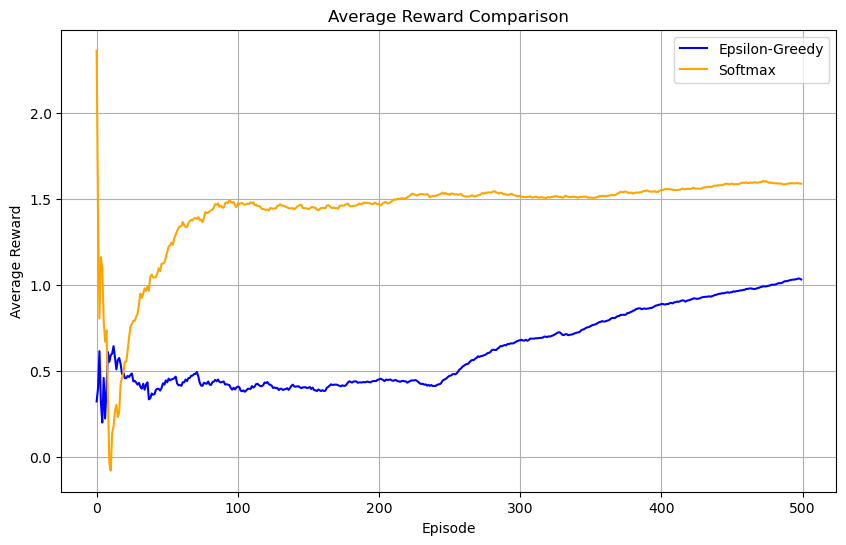

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Multi-Armed Bandit Environment
class MultiArmedBandit:
    def __init__(self, k=10):
        self.k = k
        self.q_true = np.random.normal(0, 1, k)  # true action values

    def step(self, action):
        reward = np.random.normal(self.q_true[action], 1)
        return reward


# Epsilon-Greedy Agent
class EGreedyAgent:
    def __init__(self, n_arms, epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)  # explore
        return np.argmax(self.values)  # exploit

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]


# Softmax Agent
class SoftmaxAgent:
    def __init__(self, n_arms, tau=0.1):
        self.n_arms = n_arms
        self.tau = tau  # temperature
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)

    def select_action(self):
        preferences = self.values / self.tau
        exp_prefs = np.exp(preferences - np.max(preferences))  # numerical stability
        probs = exp_prefs / np.sum(exp_prefs)
        return np.random.choice(self.n_arms, p=probs)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]


# Run experiment
def run_experiment(k=10, steps=500, epsilon=0.1, tau=0.1):
    env = MultiArmedBandit(k)
    eps_agent = EGreedyAgent(k, epsilon)
    softmax_agent = SoftmaxAgent(k, tau)

    rewards_eps = []
    rewards_softmax = []

    avg_rewards_eps = []
    avg_rewards_softmax = []

    total_eps = 0
    total_softmax = 0

    for t in range(steps):
        # Epsilon-Greedy
        action_eps = eps_agent.select_action()
        reward_eps = env.step(action_eps)
        eps_agent.update(action_eps, reward_eps)
        total_eps += reward_eps
        rewards_eps.append(reward_eps)
        avg_rewards_eps.append(total_eps / (t + 1))

        # Softmax
        action_soft = softmax_agent.select_action()
        reward_soft = env.step(action_soft)
        softmax_agent.update(action_soft, reward_soft)
        total_softmax += reward_soft
        rewards_softmax.append(reward_soft)
        avg_rewards_softmax.append(total_softmax / (t + 1))

    # Print results
    print("Epsilon-Greedy Q-values:", eps_agent.values)
    print("Total reward (Epsilon-Greedy):", round(total_eps, 2))
    print()
    print("Softmax Q-values:", softmax_agent.values)
    print("Total reward (Softmax):", round(total_softmax, 2))

    # Plot comparison
    plt.figure(figsize=(10, 6))
    plt.plot(avg_rewards_eps, label="Epsilon-Greedy", color="blue")
    plt.plot(avg_rewards_softmax, label="Softmax", color="orange")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.title("Average Reward Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()


# Main
if __name__ == "__main__":
    run_experiment(k=10, steps=500, epsilon=0.1, tau=0.1)
